In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
data=pd.read_csv('50_Startups.csv')
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


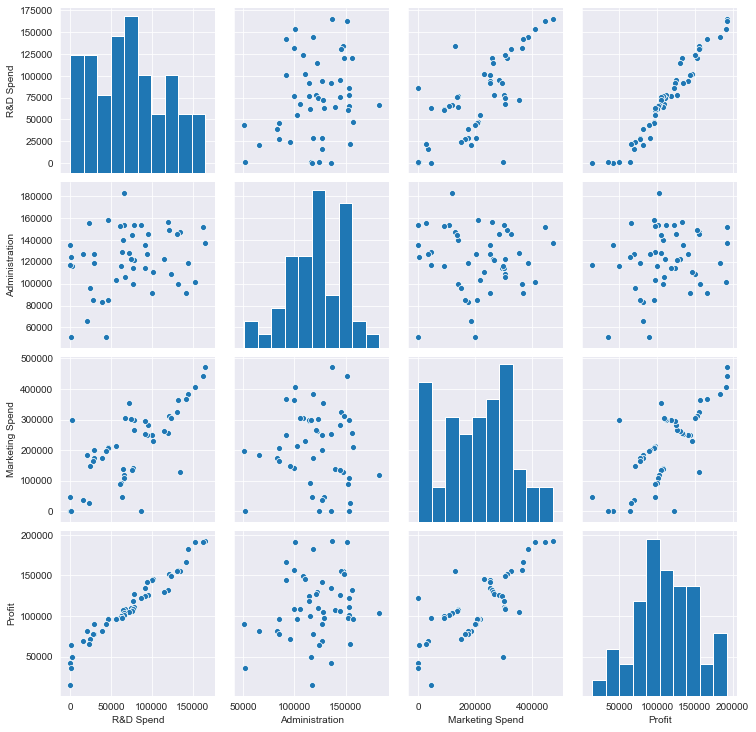

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [7]:
data1=data.copy()
data_encoded=pd.get_dummies(data1)
data_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
data_encoded1=data_encoded.rename({'R&D Spend':'RD', 'Administration':'AD', 'Marketing Spend':'MS','Profit':'PR','State_California':'SC','State_Florida':'SF','State_New York':'SNY'},axis=1)

In [25]:
data_encoded1.head()

,RD,AD,MS,PR,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
import statsmodels.formula.api as smf
model=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded1).fit()

In [11]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# iteration 1

In [12]:
Y=data_encoded1[['PR']]
Y.head()

,PR
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [13]:
X=data_encoded1[['RD','AD','MS','SC','SF','SNY']]
X.head()

,RD,AD,MS,SC,SF,SNY
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [14]:
X2=X**2

In [15]:
X2.head()

,RD,AD,MS,SC,SF,SNY
0,2.734036e+10,1.874101e+10,2.225802e+11,0,0,1
1,2.643801e+10,2.291517e+10,1.970459e+11,1,0,0
2,2.354430e+10,1.023042e+10,1.664106e+11,0,1,0
3,2.084339e+10,1.408301e+10,1.468419e+11,0,0,1
4,2.019450e+10,8.352456e+09,1.340793e+11,0,1,0


In [16]:
data_encoded2=pd.concat([X2,Y],1)

In [17]:
Y.head()

,PR
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [18]:
data_encoded2.head()

,RD,AD,MS,SC,SF,SNY,PR
0,2.734036e+10,1.874101e+10,2.225802e+11,0,0,1,192261.83
1,2.643801e+10,2.291517e+10,1.970459e+11,1,0,0,191792.06
2,2.354430e+10,1.023042e+10,1.664106e+11,0,1,0,191050.39
3,2.084339e+10,1.408301e+10,1.468419e+11,0,0,1,182901.99
4,2.019450e+10,8.352456e+09,1.340793e+11,0,1,0,166187.94


In [19]:
model1=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded2).fit()

In [20]:
(model1.rsquared,model1.rsquared_adj)

(0.8568981785205851, 0.8406366078979244)

In [52]:
#here by this  transformation we can see that r squared value is decreasing

# iteration 2

In [21]:
X3=X**(1/2)
X3.head()

,RD,AD,MS,SC,SF,SNY
0,406.631529,369.997027,686.865416,0.0,0.0,1.0
1,403.234051,389.072731,666.257105,1.0,0.0,0.0
2,391.716109,318.033882,638.697534,0.0,1.0,0.0
3,379.963696,344.487808,619.031195,0.0,0.0,1.0
4,376.971272,302.310718,605.118517,0.0,1.0,0.0


In [22]:
data_encoded3=pd.concat([X3,Y],1)
data_encoded3.head()

,RD,AD,MS,SC,SF,SNY,PR
0,406.631529,369.997027,686.865416,0.0,0.0,1.0,192261.83
1,403.234051,389.072731,666.257105,1.0,0.0,0.0,191792.06
2,391.716109,318.033882,638.697534,0.0,1.0,0.0,191050.39
3,379.963696,344.487808,619.031195,0.0,0.0,1.0,182901.99
4,376.971272,302.310718,605.118517,0.0,1.0,0.0,166187.94


In [23]:
model2=smf.ols('Y~X3',data=data_encoded3).fit()

In [24]:
(model2.rsquared,model2.rsquared_adj)

(0.9085136338382949, 0.8981174558653738)

In [58]:
#here also the r squared value is less than original dataset

# iteration 3

In [26]:
model_influence=model.get_influence()
(c_V,_)=model_influence.cooks_distance

In [27]:
data_encoded1

,RD,AD,MS,PR,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

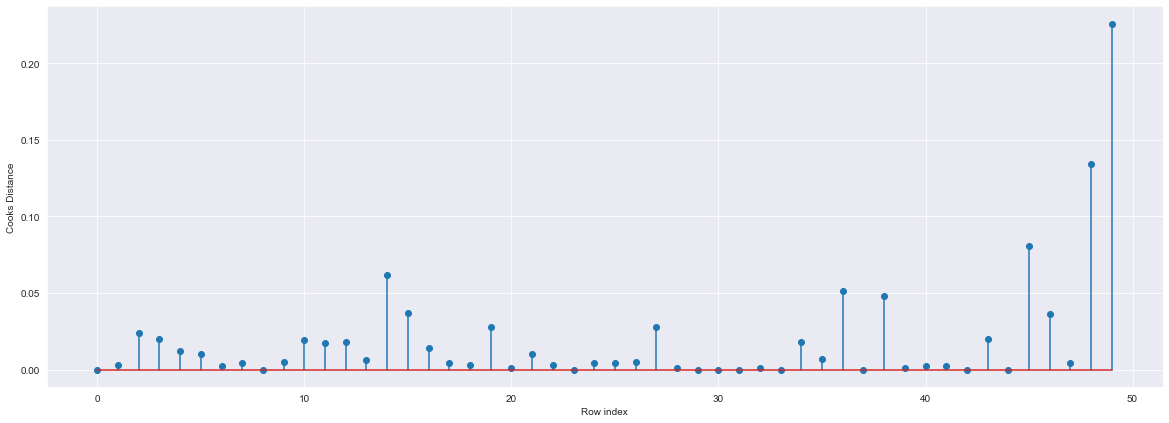

In [28]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [29]:
(np.argmax(c_V),np.max(c_V))

(49, 0.22625094501509285)

In [30]:
data_encoded0=data_encoded1.drop([49],axis=0)

In [31]:
data_encoded9=data_encoded0.reset_index()

In [32]:
data_encoded8=data_encoded9.drop(['index'],axis=1)
data_encoded8.head()

,RD,AD,MS,PR,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [33]:
model3=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded8).fit()

In [35]:
(model3.rsquared,model2.rsquared_adj)

(0.9618082858227786, 0.8981174558653738)

# iteration 3

In [37]:
model_influence=model3.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

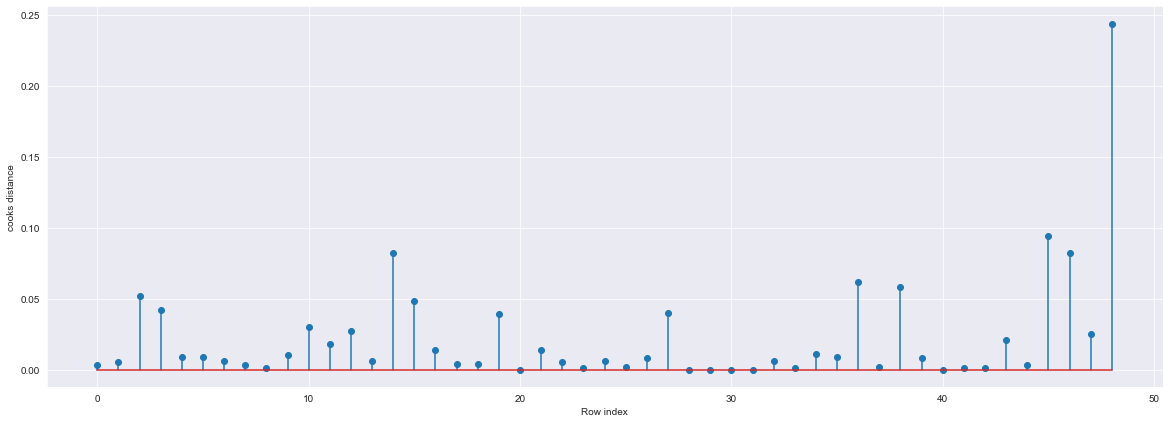

In [153]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded8)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('cooks distance')

In [38]:
(np.argmax(c_V),np.max(c_V))

(48, 0.24352817571403917)

In [39]:
data_encoded9=data_encoded8.drop([48],axis=0)

In [40]:
data_encoded10=data_encoded9.reset_index()

In [41]:
data_encoded11=data_encoded10.drop(['index'],axis=1)

In [42]:
data_encoded11.head()

,RD,AD,MS,PR,SC,SF,SNY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [43]:
model4=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded11).fit()

In [44]:
(model4.rsquared,model4.rsquared_adj)

(0.9628371102993712, 0.9584129567635821)

In [45]:
#here also it is increased a bit.

# iteration 4

In [46]:
model_influence=model4.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

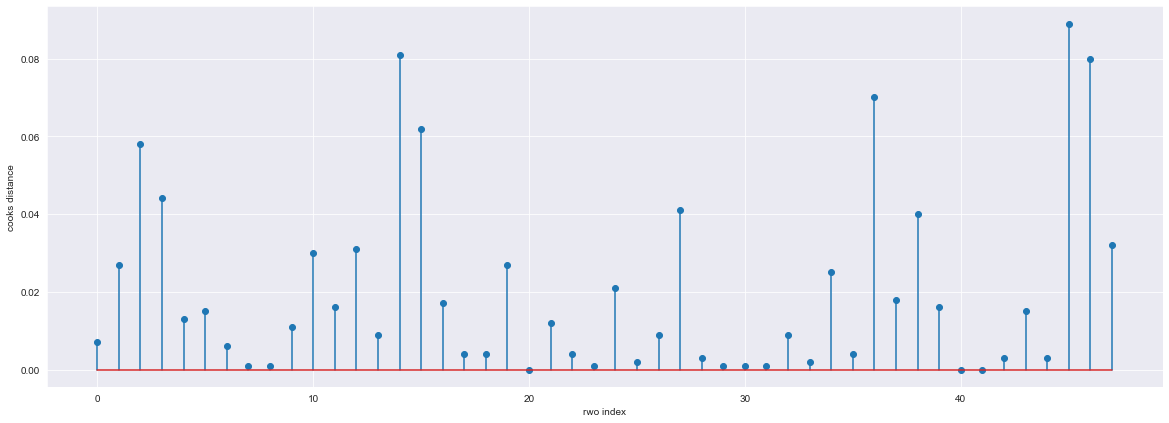

In [47]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded11)),np.round(c_V,3))
plt.xlabel('rwo index')
plt.ylabel('cooks distance')

In [48]:
(np.argmax(c_V),np.max(c_V))

(45, 0.08880445606829117)

In [49]:
data_encoded12=data_encoded11.drop([45],axis=0)

In [50]:
data_encoded13=data_encoded12.reset_index()

In [51]:
data_encoded14=data_encoded13.drop(['index'],axis=1)

In [52]:
model5=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded14).fit()

In [53]:
model5.rsquared,model5.rsquared_adj

(0.9645358420492033, 0.9602109447381305)

In [54]:
#here also incresed by bit

# iteration 5

In [55]:
model_influence=model5.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

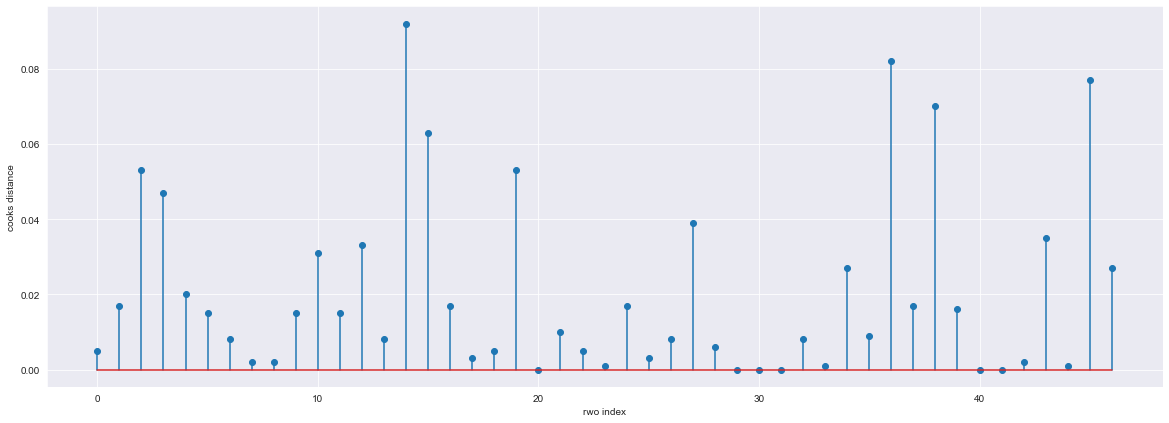

In [56]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded14)),np.round(c_V,3))
plt.xlabel('rwo index')
plt.ylabel('cooks distance')

In [57]:
(np.argmax(c_V),np.max(c_V))

(14, 0.09158916372696903)

In [58]:
data_encoded15=data_encoded14.drop([14],axis=0)

In [59]:
data_encoded16=data_encoded15.reset_index()

In [60]:
data_encoded17=data_encoded16.drop(['index'],axis=1)

In [61]:
model6=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded17).fit()

In [62]:
model6.rsquared,model6.rsquared_adj

(0.9688123272688416, 0.9649138681774467)

In [63]:
#again here also it is increased by  a bit

# iteration 6

In [64]:
model_influence=model6.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

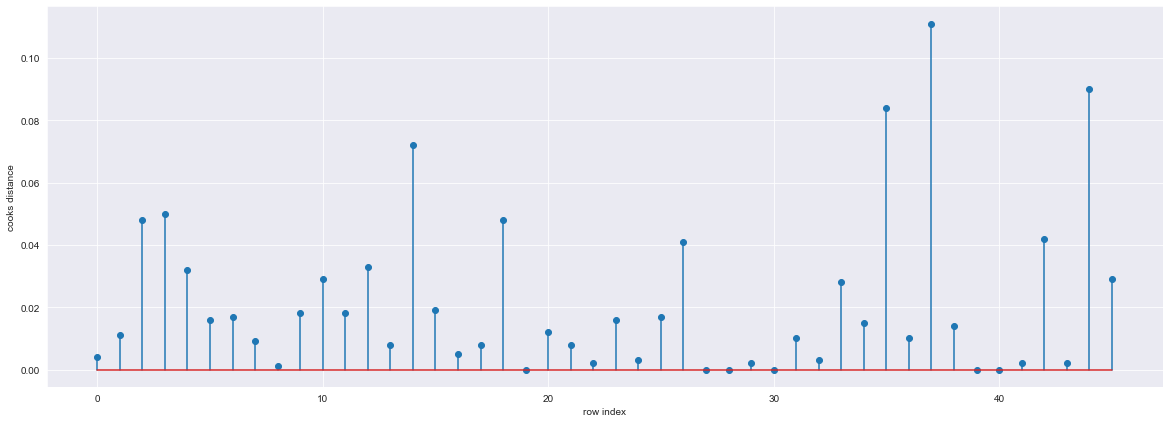

In [65]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded17)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [66]:
(np.argmax(c_V),np.max(c_V))

(37, 0.11054542464116436)

In [67]:
data_encoded18=data_encoded17.drop([37],axis=0)

In [68]:
data_encoded19=data_encoded18.reset_index()

In [69]:
data_encoded20=data_encoded19.drop(['index'],axis=1)

In [70]:
model7=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded20).fit()

In [71]:
(model7.rsquared,model7.rsquared_adj)

(0.9704259581984904, 0.9666344143777841)

# iteration 7

In [72]:
model_influence=model7.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks')

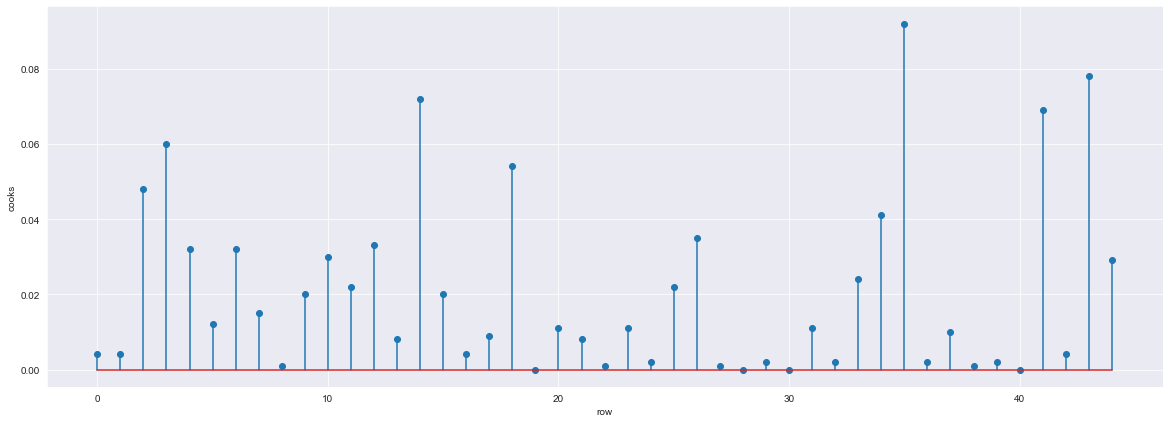

In [73]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded20)),np.round(c_V,3))
plt.xlabel('row')
plt.ylabel('cooks')

In [75]:
(np.argmax(c_V),np.max(c_V))

(35, 0.09183736039845318)

In [76]:
data_encoded21=data_encoded20.drop([35],axis=0)

In [77]:
data_encoded22=data_encoded21.reset_index()

In [78]:
data_encoded23=data_encoded22.drop(['index'],axis=1)

In [79]:
model8=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded23).fit()

In [80]:
(model8.rsquared,model8.rsquared_adj)

(0.973929872578887, 0.9704995926550563)

# iteration 8

In [81]:
model_influence=model8.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

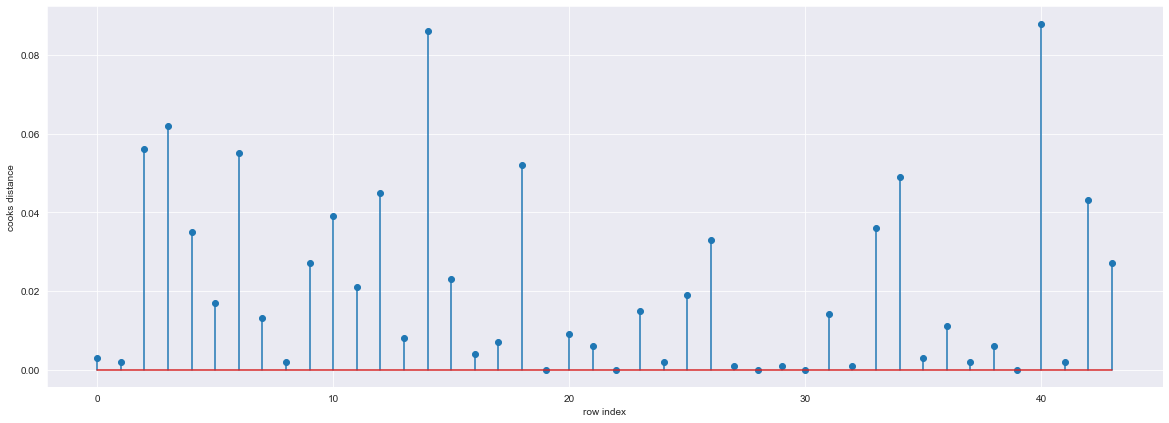

In [82]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded23)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [83]:
(np.argmax(c_V),np.max(c_V))

(40, 0.0877924350546459)

In [84]:
data_encoded24=data_encoded23.drop([40],axis=0)

In [85]:
data_encoded25=data_encoded24.reset_index()

In [86]:
data_encoded26=data_encoded25.drop(['index'],axis=1)

In [87]:
model9=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded26).fit()

In [88]:
model9.rsquared,model9.rsquared_adj

(0.9751535732059047, 0.9717959479634594)

# iteration 9

In [91]:
model_influence=model9.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

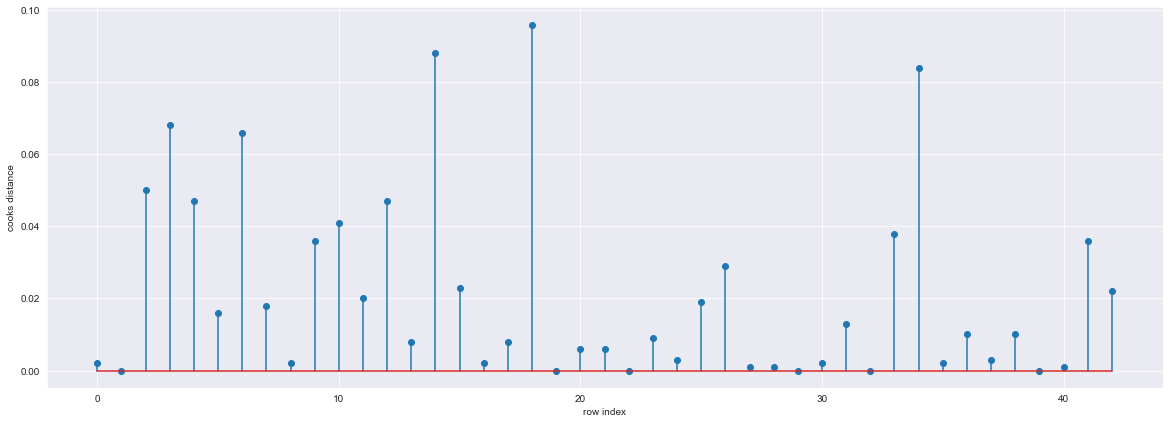

In [92]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded26)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [93]:
np.argmax(c_V)

18

In [94]:
data_encoded27=data_encoded26.drop([18],axis=0)

In [95]:
data_encoded28=data_encoded27.reset_index()

In [96]:
data_encoded29=data_encoded28.drop(['index'],axis=1)

In [97]:
model10=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded29).fit()

In [99]:
model10.rsquared

0.9764759914339785

# iteration 10

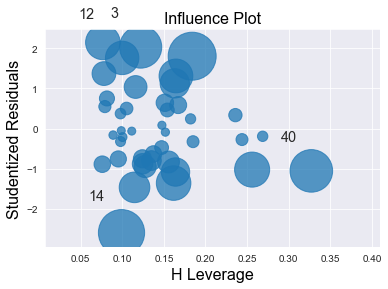

In [100]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model10)
plt.show()

In [101]:
data_encoded30=data_encoded29.drop([40,14])

In [102]:
data_encoded31=data_encoded30.reset_index()

In [103]:
data_encoded32=data_encoded31.drop(['index'],axis=1)

In [104]:
model11=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded32).fit()

In [105]:
model11.rsquared

0.9789014916891039

# iteration 11

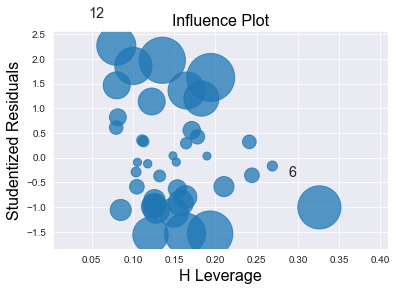

In [106]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model11)
plt.show()

In [107]:
data_encoded33=data_encoded32.drop([6,12])

In [108]:
data_encoded34=data_encoded33.reset_index()

In [109]:
data_encoded35=data_encoded34.drop(['index'],axis=1)

In [110]:
model12=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded35).fit()

In [111]:
model12.rsquared

0.9816711240997321

# iteration 12

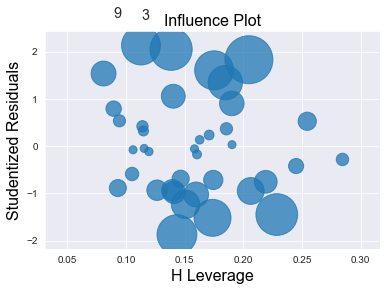

In [112]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model12)
plt.show()

In [113]:
model_influence=model12.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

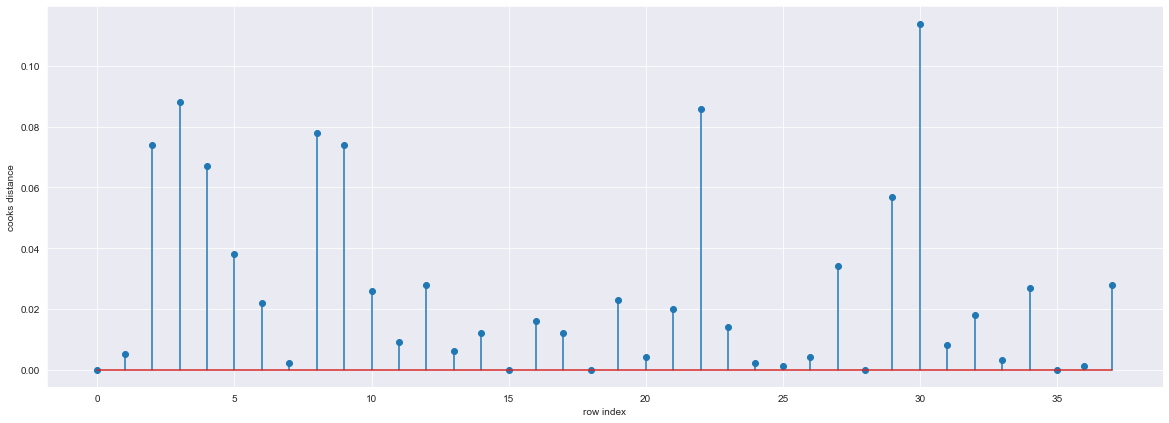

In [114]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded35)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [115]:
np.argmax(c_V)

30

In [116]:
data_encoded36=data_encoded35.drop([30],axis=0)

In [117]:
data_encoded37=data_encoded36.reset_index()

In [118]:
data_encoded38=data_encoded37.drop(['index'],axis=1)

In [119]:
model13=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded38).fit()

In [120]:
model13.rsquared

0.9832823444383962

# iteration 13

In [128]:
model_influence=model13.get_influence()
(c_V,_)=model_influence.cooks_distance


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

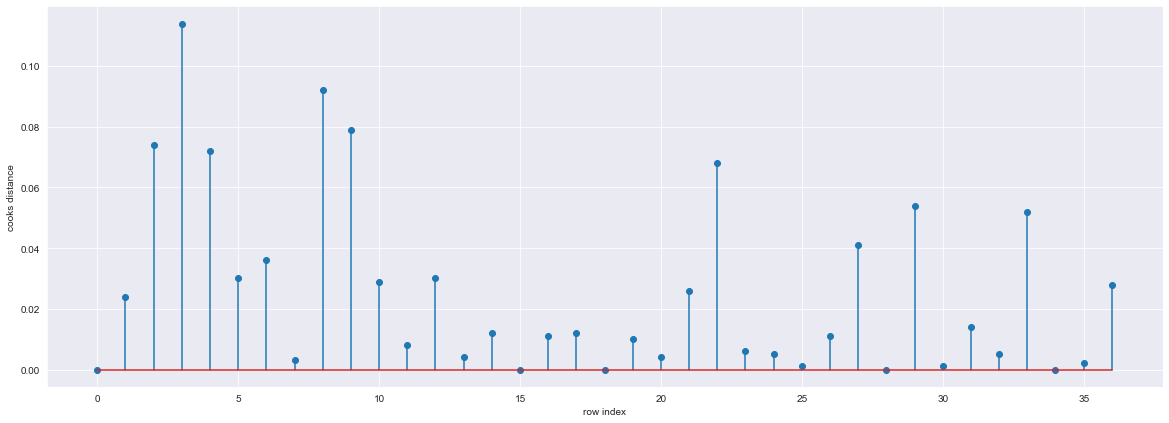

In [130]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded38)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')


In [131]:
(np.argmax(c_V),np.max(c_V))

(3, 0.11390161546369516)

In [132]:
data_encoded39=data_encoded38.drop([3],axis=0)

In [133]:
data_encoded40=data_encoded39.reset_index()

In [134]:
data_encoded41=data_encoded40.drop(['index'],axis=1)

In [135]:
model14=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded41).fit()

In [136]:
(model14.rsquared,model14.rsquared_adj)

(0.9845299194651509, 0.9819515727093427)

# iteration 14

In [137]:
model_influence=model14.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

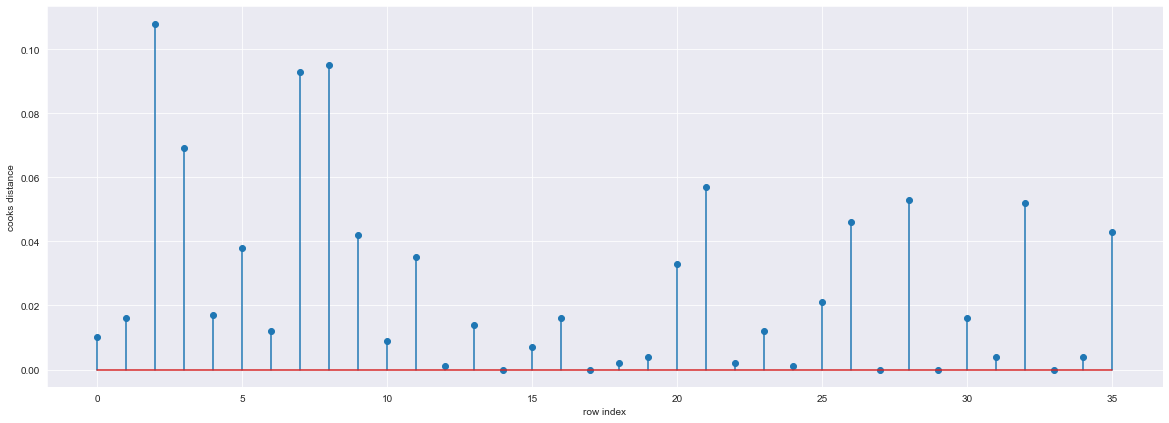

In [138]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_encoded41)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [139]:
(np.argmax(c_V),np.max(c_V))

(2, 0.10766125205201733)

In [141]:
data_encoded42=data_encoded41.drop([2],axis=0)

In [142]:
data_encoded43=data_encoded42.reset_index()

In [145]:
data_encoded44=data_encoded43.drop(['index'],axis=1)

In [146]:
model15=smf.ols('PR~RD+AD+MS+SC+SF+SNY',data=data_encoded44).fit()

In [147]:
(model15.rsquared,model15.rsquared_adj)

(0.9843568333952181, 0.9816597357047384)

In [148]:
# as we can see here in model15 the rsquared value of the model is started decreasing over here hence, model that we havve created over here is 98.45% accurate.

In [149]:
df={'models':['normal model','sq. model','sqrt. model','model 3','model4','model5','model6','model7','model8','model9','model10','model11','model12','model13','model14','model15'],'r squared values':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared,model8.rsquared,model9.rsquared,model10.rsquared,model11.rsquared,model12.rsquared,model13.rsquared,model14.rsquared,model15.rsquared]}

In [150]:
d1=pd.DataFrame(df)
d1

,models,r squared values
0,normal model,0.950752
1,sq. model,0.856898
2,sqrt. model,0.908514
3,model 3,0.961808
4,model4,0.962837
5,model5,0.964536
6,model6,0.968812
7,model7,0.970426
8,model8,0.973930
9,model9,0.975154
